# Atenção

Este é o exercício 2 de Roofit, o exercício 1 se encontra neste repositório com o nome: Roofit_exercicio1_relatorio

In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


In [ ]:
# Exercício 2

In [ ]:
#Esse exercício é baseado no arquivo chamado: DataSet_lowstat.root
#Que se encontra neste repositório

In [ ]:
#Esse exercício consiste basicamente em "construir" uma distribuição 
# Crystal ball para o J/{\psi}

In [ ]:
#Esse exercício consiste basicamente em "construir" uma distribuição 
# Crystal ball para o J/psi e uma similiar para o psi2S, essa função 
#similar seria uma gaussiana

In [ ]:
# Para saber mais sobre a função Crystal Ball: 
#  https://people.cs.uchicago.edu/~yongshan/papers/j-psi-analysis.pdf

In [ ]:
#Vamos começar importando o "data" do arquivo.root mensionado 
#anteriormente

In [2]:
file = ROOT.TFile('DataSet_lowstat.root')
dataset = file.Get("data")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [ ]:
#Vamos começar declarando a variável massa, que seria a massa dos muons

In [3]:
mass = ROOT.RooRealVar("mass", "Massa invariante dos Muons",2.,6.,"GeV")

In [ ]:
#Agora vamos declarar as variáveis para o J/psi
#Ao invés de usa alfa, como na equação link de referência, vou usar
#k para facilitar um pouco mais a escrita.

In [4]:
media = ROOT.RooRealVar("media","media do J/psi",3.1,2.8,3.2)
sigma1 = ROOT.RooRealVar("sigma1","sigma do J/psi",0.3,0.0001,1.)
k = ROOT.RooRealVar("sigma","K do J/psi",1.5,-5.,5.)
n = ROOT.RooRealVar("n","n do J/psi",1.5,0.5,5.)

In [ ]:
#Vamos declarar um PDF para o J/psi

In [5]:
CBShapepsi = ROOT.RooCBShape( "CBshapeJpsi","PDF do J/psi", mass, media, sigma1, k, n)

In [6]:
#Agora vamos declarar as variáveis para o psiS2

In [6]:
media2 = ROOT.RooRealVar("media2","media2",3.7,3.6,3.8)
sigma2 = ROOT.RooRealVar("sigma2","sigma2",0.3,0.0001,1.)

In [ ]:
#Vamos declarar a gaussiana para o Psi2S

In [7]:
gauss= ROOT.RooGaussian("gauss","Gaussiana do Psi2S", mass, media2, sigma2)

In [ ]:
#Para declarar o background com polinômio vamos começar com as 
# variáveis 

In [8]:
a = ROOT.RooRealVar("a","a",-0.7,-2.,2.)
b = ROOT.RooRealVar("b","b",0.3,-2.,2.)
c = ROOT.RooRealVar("c","c",-0.03,-2.,2.)


In [ ]:
#Agora vamos fazer o polinomio do background

In [9]:
polibk = ROOT.RooPolynomial("polibk","Polinomio do Backgroun", mass, ROOT.RooArgList(a,b,c))

In [ ]:
#Vamos fazer a declaração para os pequenos sinais de eventos

In [10]:
ev1 = ROOT.RooRealVar("ev1","signais de eventos do Jpsi",1500.,0.1,10000.)
ev2 = ROOT.RooRealVar("ev2","Sinais de eventos do psi2S",100.,0.1,5000.)
ev3 = ROOT.RooRealVar("ev3","Sinais de eventos do backgruund",5000.,0.1,50000.)

In [ ]:
#Para fazer a combinação dos PDF considerando o numero de eventos
#para o Jpsi, psi2S e o Background podemos fazer a soma deles:

In [11]:
somaPDF = ROOT.RooAddPdf("somaPDF","Soma dos PDFs",ROOT.RooArgList(CBShapepsi,gauss,polibk),ROOT.RooArgList(ev1,ev2,ev3))

In [ ]:
#Vamos fazer o fit da soma dos PDFs para o dataset

In [12]:
somaPDF.fitTo(dataset)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (CBshapeJpsi,gauss,polibk)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a           -7.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     2 b            3.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 c           -3.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     4 ev1          1.50000e+03  7.49950e+02    1.00000e-01  1.00000e+04
     5 ev2          1.00000e+02  4.99500e+01    1.00000e-01  5.00000e+03
     6 ev3          5.00000e+03  2.49995e+03    1.00000e-01  5.00000e+04
     7 media        3.10000e+00  4.00000e-02    2.80000e+00  3.20000e

In [ ]:
# Vamos fazer o plot da somaPDF e dataset, lembrando que precisamos 
# criar um TCanvas chamado c1. Vamos salvar em formato pdf

Info in <TCanvas::Print>: pdf file Jpsi_Roofit.pdf has been created


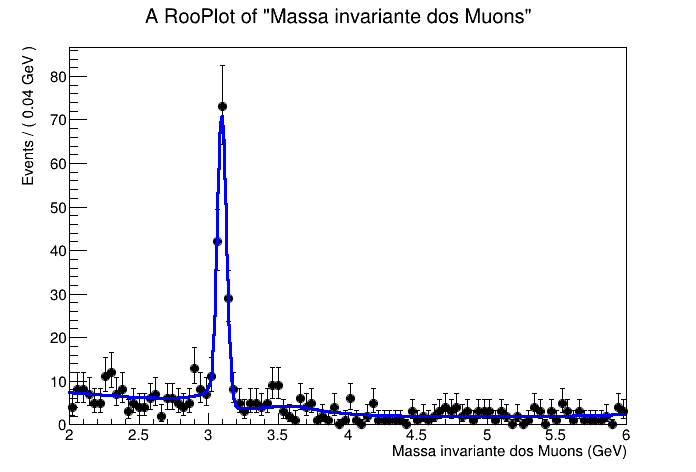

In [13]:
xframe2 = mass.frame()
dataset.plotOn(xframe2)
somaPDF.plotOn(xframe2)
c1 = ROOT.TCanvas()
xframe2.Draw()
c1.SaveAs("Jpsi_Roofit.pdf")
c1.Draw()

In [ ]:
# Feito o plot, agora vamos importar o dataset e a soma com o comando:
# RooWorkspace().

In [16]:
ws = ROOT.RooWorkspace("ws")
getattr(ws,'import')(dataset)
getattr(ws,'import')(somaPDF)

arq = ROOT.TFile("exercicio2_Roofit.root","RECREATE")
ws.Write()
arq.Write()
arq.Close()

[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing dataset data
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooAddPdf::somaPDF
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooCBShape::CBshapeJpsi
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::media
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::sigma1
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::sigma
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::n
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::ev1
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooGaussian::gauss
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::media2
[#1] INFO:ObjectHandling -- RooWorkspace::import(ws) importing RooRealVar::sigma2
[#1] INFO:ObjectHandling -- R